# **1. Perkenalan Dataset**


Dataset yang digunakan dalam eksperimen ini adalah Heart Disease Dataset yang diperoleh dari Kaggle (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). Dataset ini berfokus pada prediksi penyakit kardiovaskular (CVD) yang merupakan penyebab kematian nomor 1 secara global, dengan perkiraan 17.9 juta kematian setiap tahunnya (31% dari total kematian dunia).

## Deskripsi Dataset
- **Jumlah Data**: 918 baris (sampel pasien)
- **Jumlah Fitur**: 11 fitur + 1 target
- **Tipe Data**: Numerik dan Kategorikal
- **Target**: Klasifikasi biner (memiliki/tidak memiliki penyakit jantung)

## Fitur-fitur Dataset

| No | Nama Fitur | Tipe Data | Deskripsi | Nilai/Keterangan |
|----|------------|-----------|-----------|------------------|
| 1 | Age | Numerik | Usia pasien | Dalam tahun |
| 2 | Sex | Kategorikal | Jenis kelamin | M: Male (Laki-laki)<br>F: Female (Perempuan) |
| 3 | ChestPainType | Kategorikal | Tipe nyeri dada | TA: Typical Angina<br>ATA: Atypical Angina<br>NAP: Non-Anginal Pain<br>ASY: Asymptomatic |
| 4 | RestingBP | Numerik | Tekanan darah istirahat | Dalam mm Hg |
| 5 | Cholesterol | Numerik | Kadar kolesterol serum | Dalam mm/dl |
| 6 | FastingBS | Numerik | Gula darah puasa | 1: jika > 120 mg/dl<br>0: jika ≤ 120 mg/dl |
| 7 | RestingECG | Kategorikal | Hasil elektrokardiogram istirahat | Normal: Normal<br>ST: kelainan gelombang ST-T<br>LVH: hipertrofi ventrikel kiri |
| 8 | MaxHR | Numerik | Detak jantung maksimum | Nilai antara 60-202 |
| 9 | ExerciseAngina | Kategorikal | Angina saat berolahraga | Y: Ya<br>N: Tidak |
| 10 | Oldpeak | Numerik | Nilai ST depression | Nilai numerik |
| 11 | ST_Slope | Kategorikal | Slope segmen ST | Up: upsloping<br>Flat: datar<br>Down: downsloping |
| 12 | HeartDisease | Target | Kelas output | 1: memiliki penyakit jantung<br>0: normal |


# **2. Import Library**

Pada tahap ini, kita mengimpor library yang diperlukan untuk analisis data dan pembangunan model:
- pandas dan numpy untuk manipulasi data
- matplotlib dan seaborn untuk visualisasi
- sklearn untuk preprocessing dan pembagian data
- warnings untuk mengabaikan peringatan yang tidak perlu

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, kita memuat dataset heart.csv menggunakan pandas. Setelah memuat data, kita melakukan pemeriksaan awal untuk memahami struktur data dengan menampilkan:
- Dimensi dataset (shape)
- Informasi tipe data setiap kolom
- Sample data (5 baris pertama)
- Statistik deskriptif untuk memahami distribusi data

In [ ]:
df = pd.read_csv('..\heart_raw\heart.csv')
print("Shape dataset:", df.shape)

Shape dataset: (918, 12)


In [5]:
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [6]:
print("\nSample data:")
df.head()


Sample data:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita melakukan analisis eksploratif untuk memahami karakteristik data melalui:
1. Analisis statistik deskriptif untuk memahami distribusi data
2. Pengecekan missing values untuk memastikan kualitas data
3. Visualisasi distribusi target (HeartDisease) untuk memahami balance dataset
4. Analisis korelasi antar fitur menggunakan heatmap
5. Visualisasi distribusi setiap fitur numerik berdasarkan target
6. Visualisasi distribusi setiap fitur kategorik berdasarkan target

## 1. Statistik Deskriptif

In [8]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


## 2. Cek Missing Values

In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## 3. Visualisasi Distribusi Target

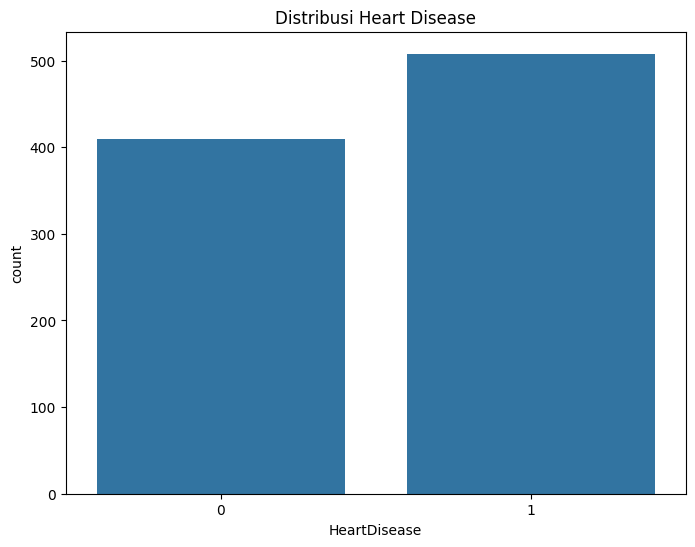

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribusi Heart Disease')
plt.show()

## 4. Visualisasi Korelasi

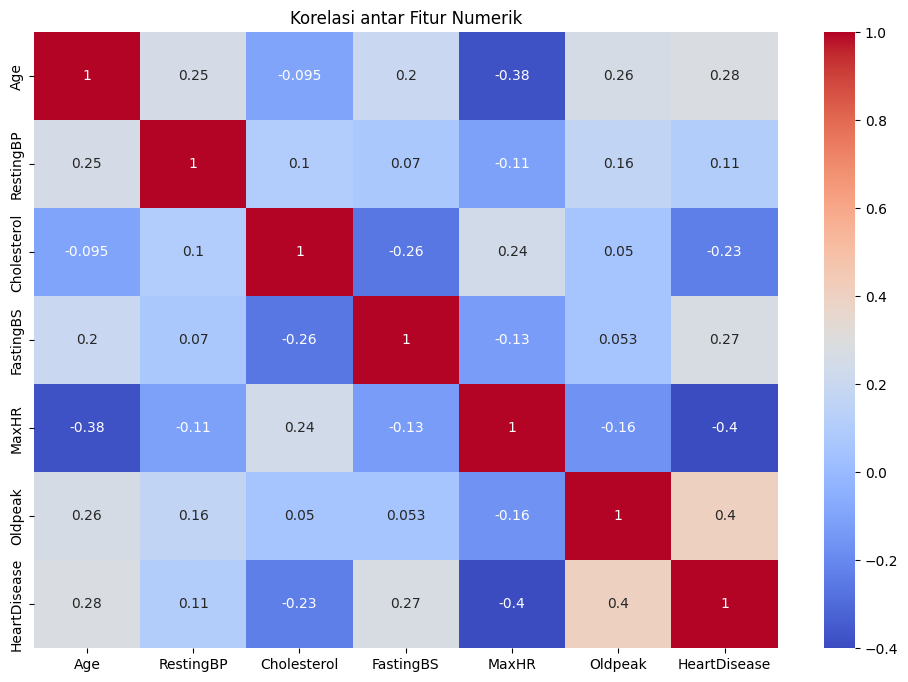

In [12]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

## 5. Visualisasi Distribusi Fitur Numerik

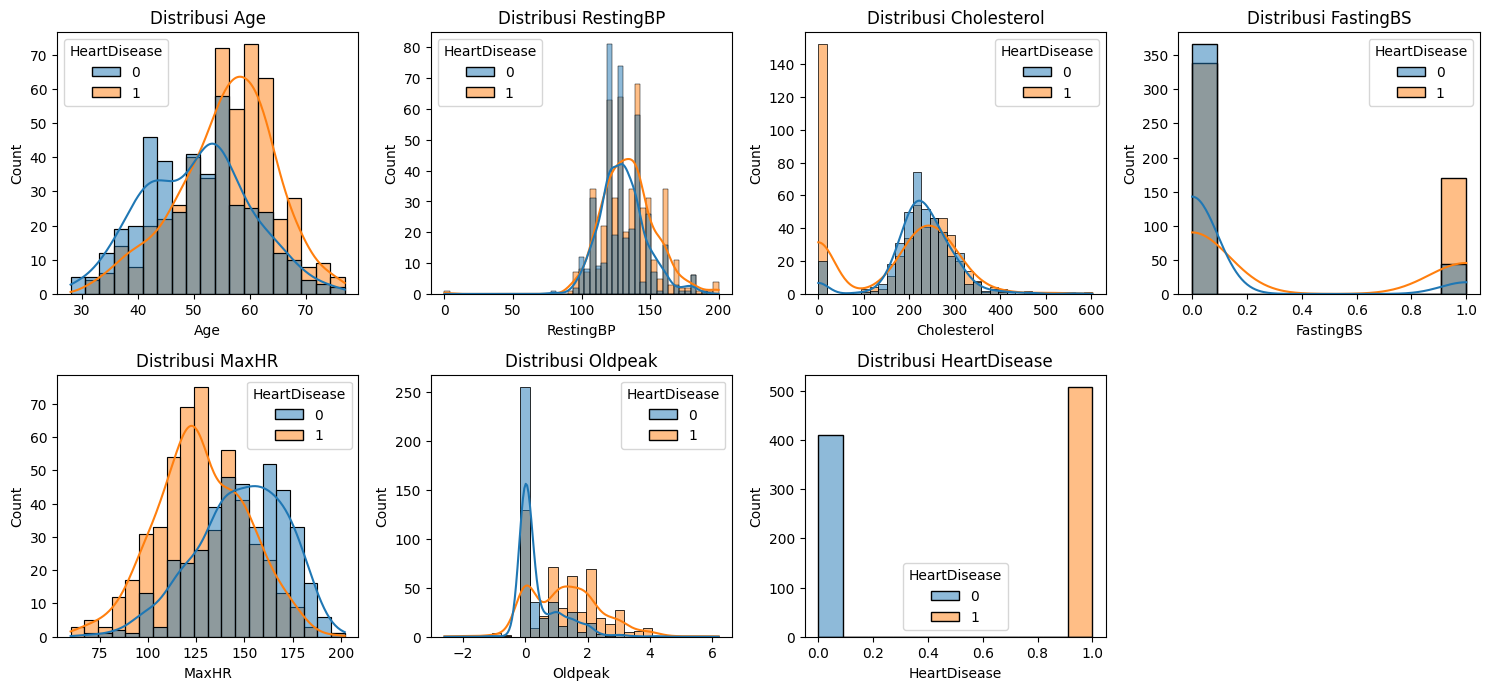

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=col, hue='HeartDisease', kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

## 6. Visualisasi Distribusi Fitur Kategorik

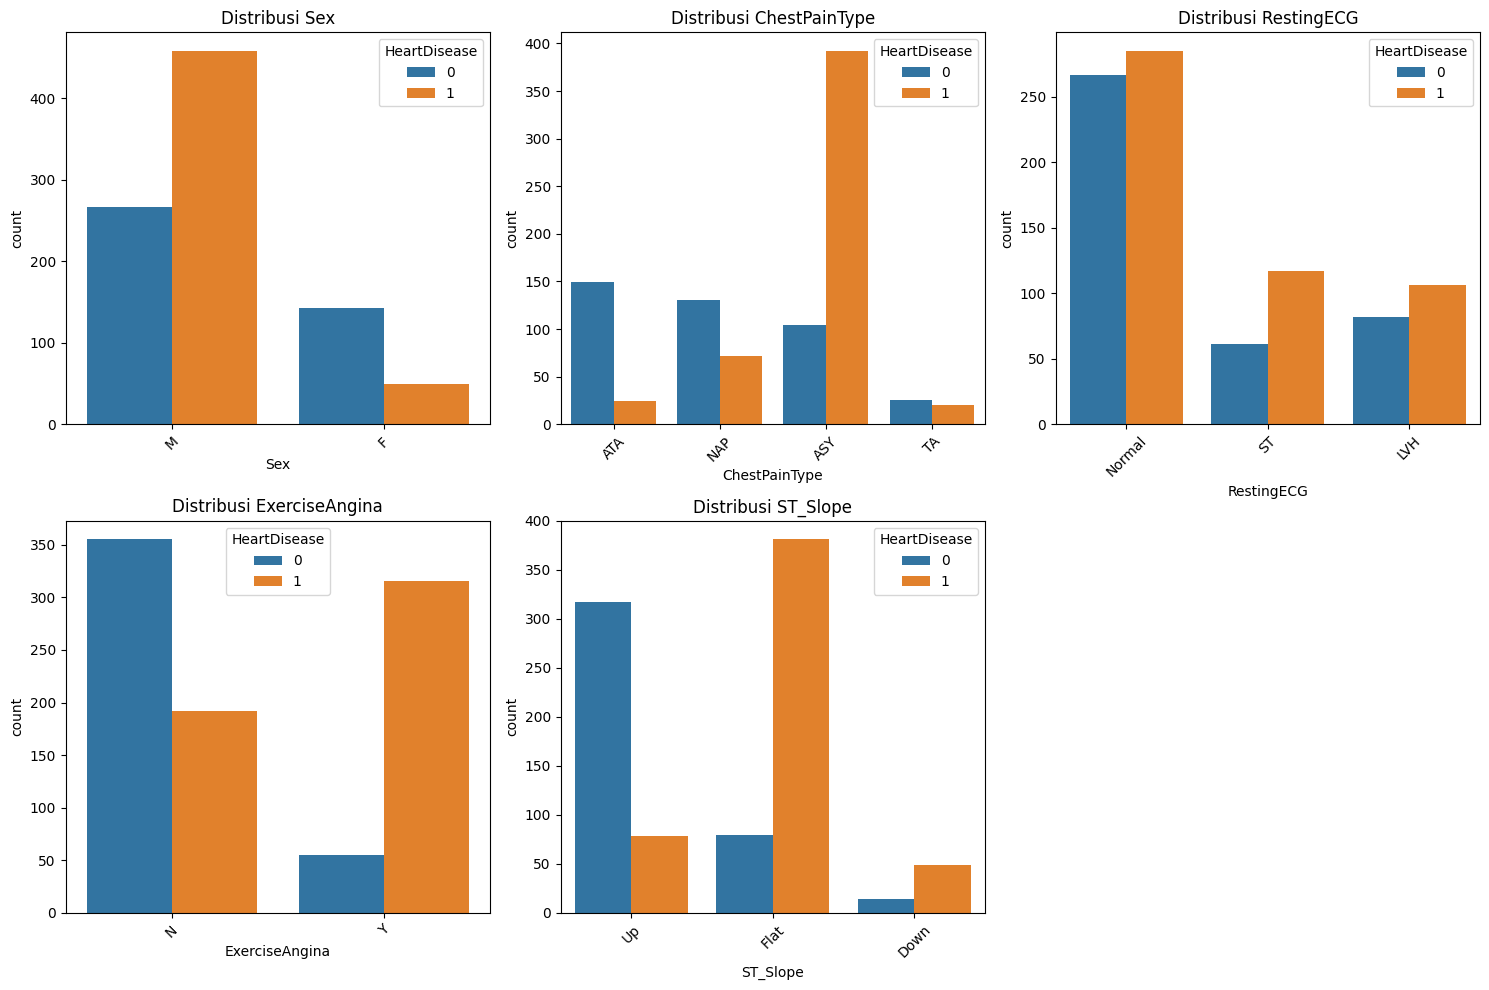

In [14]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, kita melakukan preprocessing data untuk mempersiapkan data sebelum digunakan dalam model:
1. Memisahkan fitur (X) dan target (y)
2. Melakukan encoding pada variabel kategorikal menggunakan one-hot encoding
3. Melakukan normalisasi pada fitur numerik menggunakan StandardScaler
4. Membagi data menjadi training set dan test set dengan rasio 80:20
5. Menyimpan hasil preprocessing ke dalam file CSV terpisah

## 1. Memisahkan fitur dan target

In [15]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

## 2. Encoding variabel kategorikal

In [16]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## 3. Normalisasi fitur numerik

In [17]:
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

## 4. Split data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape setelah preprocessing:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shape setelah preprocessing:
X_train: (734, 15)
X_test: (184, 15)
y_train: (734,)
y_test: (184,)


## 5. Simpan data yang sudah diproses

In [24]:
if not os.path.exists('heart_preprocessing'):
    os.makedirs('heart_preprocessing')

X_train.to_csv('heart_preprocessing/X_train.csv', index=False)
X_test.to_csv('heart_preprocessing/X_test.csv', index=False)
y_train.to_csv('heart_preprocessing/y_train.csv', index=False)
y_test.to_csv('heart_preprocessing/y_test.csv', index=False)